<a href="https://colab.research.google.com/github/hippo2311/Credit_Risk_Analytics/blob/main/Credit_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

This dataset provides information on credit risk classification for individual customers. Each row corresponds to a customer profile with various attributes, such as age, job type, credit amount, and loan duration. The primary objective is to predict the credit risk status (`Risk`), indicating whether a customer is a 'good' or 'bad' credit risk. Understanding these factors can help financial institutions make informed lending decisions and mitigate potential risks. The features include:

- **Age:** The customer's age.
- **Job:** The type of job held by the customer.
- **Credit Amount:** The total amount of credit granted, in Deutsche Mark (DM).
- **Duration:** The loan duration in months.
- **Purpose:** The purpose of the loan (e.g., car purchase, education, or furniture).
- **Risk:** The target variable indicating the credit risk classification (good or bad).

By analyzing these features and their relationship with the risk outcome, we can develop predictive models to assist in identifying high-risk customers and optimizing credit approval processes.


# Summary of Insights and Model Performance

## 1. Data Handling:
- **Missing Data:** Removed missing values from `Checking amount` and `Saving amount`. This maintains data integrity but may reduce sample size.

## 2. Insights from Analysis:
- **Age Group:**
  - Younger borrowers (< 30) generally show lower risk, suggesting stable financial behavior.
  - Older borrowers (> 50) often present higher risk due to increased financial obligations or reduced earning capacity.

- **Wealth Analysis:**
  - Higher wealth (measured by `Saving amount` and `Checking amount`) is associated with lower credit risk.
  - Borrowers with minimal savings or checking accounts tend to exhibit higher risk, indicating financial instability.

- **Gender:**
  - Risk distribution between genders may reveal differences in borrowing behavior or financial stability, but further analysis is needed.

- **High vs. Low Risk:**
  - High-risk borrowers often have higher credit amounts and longer loan durations, reflecting a greater likelihood of default.
  - Low-risk borrowers typically manage smaller loans and have more stable financial profiles.

## 3. Machine Learning Model Performance:
- **Logistic Regression (LR):** 0.951 (±0.037) – High accuracy, good for binary classification.
- **Linear Discriminant Analysis (LDA):** 0.942 (±0.033) – Performs well, similar to Logistic Regression.
- **K-Nearest Neighbors (KNN):** 0.819 (±0.034) – Moderate performance, sensitive to data distribution.
- **Decision Tree (CART):** 0.729 (±0.060) – Lower accuracy, prone to overfitting.
- **Naive Bayes (NB):** 0.901 (±0.038) – Good performance, especially with categorical data.
- **Random Forest (RF):** 0.879 (±0.045) – Reliable, but slightly lower than logistic models.
- **Support Vector Machine (SVM):** 0.998 (±0.005) – Excellent performance, very high accuracy.
- **XGBoost (XGB):** 0.818 (±0.050) – Moderate performance, good for complex data but can overfit.

## 4. Decision Tree Analysis:
- **Feature Importance:** Credit amount, loan duration, and age are the most important features in the decision-making process.
- **Insights:**
  - **Credit Amount:** Lower amounts generally lead to "Good" risk classification, while higher amounts are linked to "Bad" risk.
  - **Loan Duration:** Shorter durations indicate lower risk, while longer durations increase risk.
  - **Age:** Younger borrowers (< 29.5) are often categorized as lower risk, while older borrowers (> 56.5) with high credit amounts tend to be higher risk.
- **Use Case:** The decision tree model is useful for understanding how different features contribute to credit risk classification due to its visual interpretability.

## 5. Recommendations:
- **Model Selection:** SVM performs best overall, but Logistic Regression or LDA are more interpretable. To know more about the charactorist of customer in bad risk and good risk can also consider Decistion Tree.
- **Feature Importance:** Focus on wealth indicators and age groups for refining credit risk strategies.
- **Further Optimization:** Hyperparameter tuning and feature engineering could further improve model accuracy and robustness.

## 6. Conclusion:
- Machine learning models effectively predict credit risk. Removing missing data ensures quality, but optimizing model selection and feature use is key to achieving the best results.


# **1. LOAD LIBRARY**

In [4]:
# @title
!pip install chart_studio
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import tools
import chart_studio.plotly as py # after installation, this line should work
import plotly.figure_factory as ff
import plotly.graph_objs as go
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from google.colab import drive
drive.mount('/content/drive')
import warnings
warnings.filterwarnings("ignore")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **2. LOAD DATA**

In [5]:
# @title
df = pd.read_csv("/content/drive/MyDrive/german_credit_data.csv", index_col=0)
org_df = df.copy()

# **3.UNDERSTANDING DATA**
**First Look at the data:**
-  the Type of Data
- Null Numbers
- Unique values
- The first rows of our dataset
- Data Distribution

**Summary:**


*   We have four numeric and four categorical features.
*   The average age of people in our dataset is 35.54
*   The average credit amount borrowed is 3271

In [6]:
# @title

df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [7]:
# @title
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


In [8]:
# @title
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [9]:
# @title
df.shape

(1000, 10)

The data includes 1000 rows and 10 attributes

In [10]:
df.columns.values

array(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype=object)

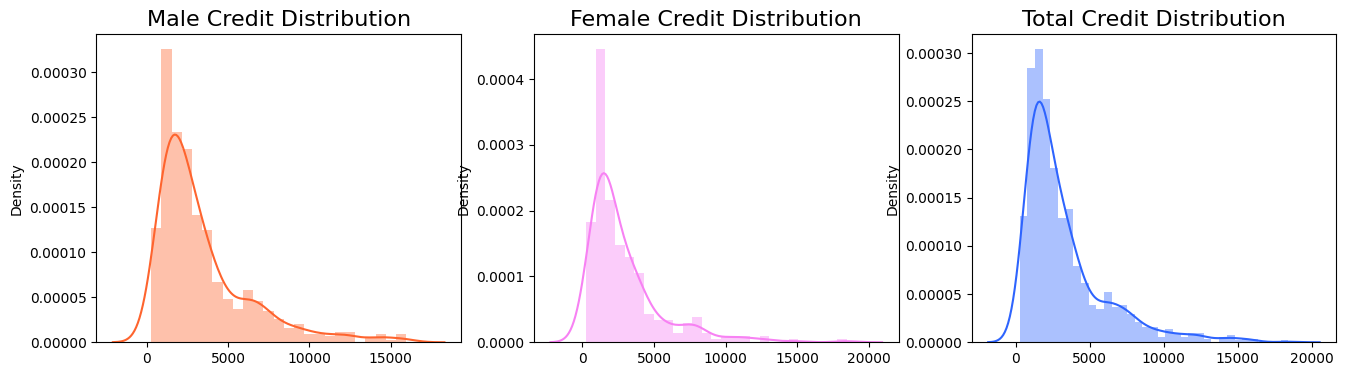

In [11]:
# @title
# Distribution of Credit_Amount for each Gender
male_credit = df["Credit amount"].loc[df["Sex"] == "male"].values
female_credit = df["Credit amount"].loc[df["Sex"] == "female"].values
total_credit = df['Credit amount'].values

fig, ax = plt.subplots(1, 3, figsize=(16,4))

sns.distplot(male_credit, ax=ax[0], color="#FE642E")
ax[0].set_title("Male Credit Distribution", fontsize=16)
sns.distplot(female_credit, ax=ax[1], color="#F781F3")
ax[1].set_title("Female Credit Distribution", fontsize=16)
sns.distplot(total_credit, ax=ax[2], color="#2E64FE")
ax[2].set_title("Total Credit Distribution", fontsize=16)
plt.show()

**Credit Distribution by Gender:**
- **Male Credit Distribution:** The orange histogram displays the distribution of credit amounts for male customers, showing that the majority of loans are below 5000.
-**Female Credit Distribution:** The pink histogram shows the distribution of credit amounts for female customers, following a similar pattern as males but with fewer loans.
-**Total Credit Distribution:** The blue histogram represents the total distribution of credit for both male and female customers, highlighting the overall variance in credit amounts across different levels.


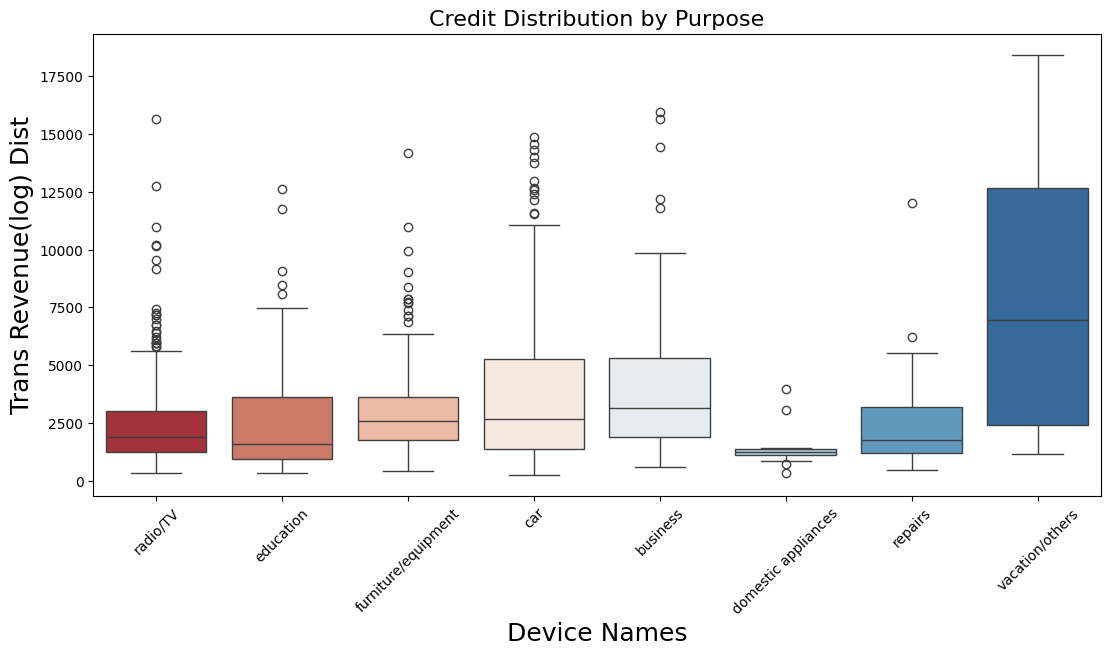

In [12]:
# @title
plt.figure(figsize=(13,6)) #figure size
g = sns.boxplot(x='Purpose', y='Credit amount',
                   data=df, palette="RdBu")


g.set_title("Credit Distribution by Purpose", fontsize=16)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel('Device Names', fontsize=18) # Xlabel
g.set_ylabel('Trans Revenue(log) Dist', fontsize=18)
plt.show()

**Credit Distribution by Purpose:**
- Radio/TV and domestic appliances loans have lower medians and less variability, suggesting smaller loans.
- Vacation/others has the highest median and broad distribution, showing significant variation in loan sizes.


# **3. VISUALIZE MISSING DATA**

<Axes: >

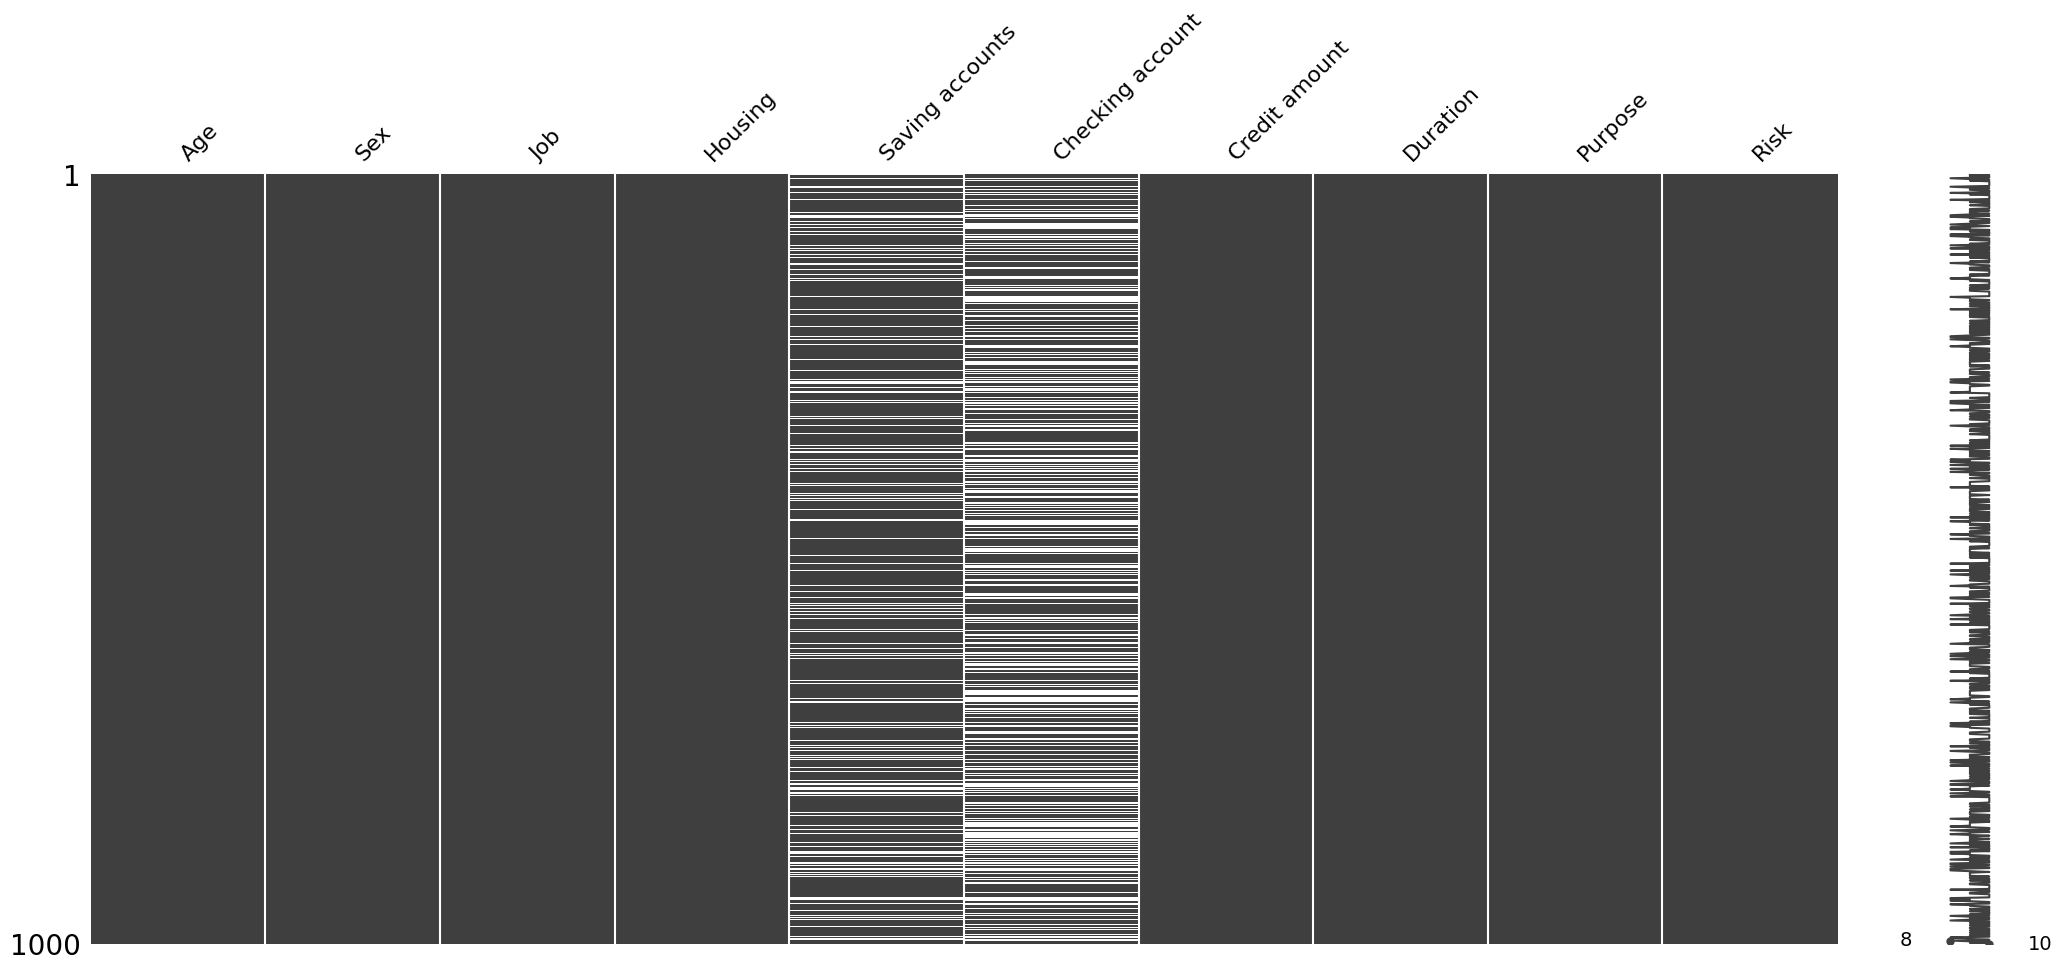

In [13]:
msno.matrix(df)


There are a lot of missing data in Saving_account and Checking_account columns.

In [14]:
df = df.rename(columns={"Credit amount": "Credit_amount", "Saving accounts": "Saving_accounts", "Checking account":"Checking_account"})

Change the Credit amount, Saving accounts, Checking accounts to codeable forms

# **4. DATA EXPLORATION BY GROUP**

# **4.1 GENDER ANALYSIS:**

**Objectives:**
- Find the distribution of genders in our dataset.
- What were the main application reasons for a credit loan? Does it vary by Gender?
- How many jobs does each gender have? How many are Unemployed?

**Summary:**
- Theres 2x more males than females in our dataset.
- Most females that applied for a credit loan were less than 30.
- Most of the males that applied for a loan ranged from their 20s-40s.
- Females were more likely to apply for a credit loan tobuy furniture and equipment. (10% more than males)
- Males applied 2x more than females for a credit loan to invest in a business.
- 2x of males worked 3 jobs compared to females.
- most people that applied for a credit loan have two jobs!

In [15]:
# @title
df["Sex"].value_counts()

,count
Sex,
male,690
female,310


Theres 2x more males than females in our dataset.

In [16]:
# @title
!pip install plotly
from plotly.offline import iplot # import the iplot function from the plotly.offline module
from plotly import tools
import chart_studio.plotly as py  # Import from chart_studio instead of plotly
import plotly.graph_objs as go

by_age = df['Age'].values.tolist()
male_age = df['Age'].loc[df['Sex'] == 'male'].values.tolist()
female_age = df['Age'].loc[df['Sex'] == 'female'].values.tolist()

trace0 = go.Histogram(
    x=male_age,
    histnorm='probability',
    name="German Male",
    marker = dict(
        color = 'rgba(100, 149, 237, 0.6)',
    )
)
trace1 = go.Histogram(
    x=female_age,
    histnorm='probability',
    name="German Female",
    marker = dict(
        color = 'rgba(255, 182, 193, 0.6)',
    )
)
trace2 = go.Histogram(
    x=by_age,
    histnorm='probability',
    name="Overall Gender",
     marker = dict(
        color = "Green",
    )
)
fig = tools.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Males','Female', 'All Genders'))

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(showlegend=True, title='Distribution of Gender', bargap=0.05)
iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

- Most females that applied for a credit loan were less than 30.
- Most of the males that applied for a loan ranged from their 20s-40s

In [17]:
# @title
df["Purpose"].unique()
sex_purpose = pd.crosstab(df['Purpose'], df['Sex']).apply(lambda x: round(x/x.sum() * 100,2))
sex_purpose

Sex,female,male
Purpose,,
business,6.13,11.30
car,30.32,35.22
domestic appliances,1.94,0.87
education,7.74,5.07
furniture/equipment,23.87,15.51
radio/TV,27.42,28.26
repairs,1.61,2.46
vacation/others,0.97,1.30


- Females were more likely to apply for a credit loan tobuy furniture and equipment. (10% more than males)
- Males applied 2x more than females for a credit loan to invest in a business.

In [18]:
# @title
number_of_jobs = pd.crosstab(df["Job"], df["Sex"]).apply(lambda x: round(x/x.sum() * 100,2))
number_of_jobs

Sex,female,male
Job,,
0,3.87,1.45
1,20.65,19.71
2,63.55,62.75
3,11.94,16.09


# **4.2 AGE GROUP**
* Young: Clients age ranges from (19 - 29).
* Young Adults: Clients age ranges from (30-40)
* Senior: Clients age ranges from (41-55)
* Elder: Clients age is more than 55 years old

**Summary:**
* The younger age group tended to ask slightly for higher loans compared to the older age groups.
* The young and elederly groups had the highest ratio of high risk loans. With 45.29% of all the clients that belong to the young age group being considered of high risk.
* The number of loans that were considered of high risk within the elderly group is 44.28% of the total amount of people considered in the elderly group.


**Create feature for Age (Young Senior Elder)**

In [19]:
# @title
df['Age_Group'] = np.nan

for i in range(len(df)): # Loop through each row of the DataFrame
    if df.loc[i, 'Age'] > 18 and df.loc[i, 'Age'] <= 29:
        df.loc[i, 'Age_Group'] = 'Young'
    elif df.loc[i, 'Age'] > 29 and df.loc[i, 'Age'] <= 40:
        df.loc[i, 'Age_Group'] = 'Young Adults'
    elif df.loc[i, 'Age'] > 40 and df.loc[i, 'Age'] <= 55:
        df.loc[i, 'Age_Group'] = 'Senior'
    elif df.loc[i, 'Age'] > 55:
        df.loc[i, 'Age_Group'] = 'Elder'

df.head()

,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose,Risk,Age_Group
0,67,male,2,own,NaN,little,1169,6,radio/TV,good,Elder
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,Young
2,49,male,1,own,little,NaN,2096,12,education,good,Senior
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,Senior
4,53,male,2,free,little,little,4870,24,car,bad,Senior


In [20]:
# @title
# Take credit amount values into a list
young = df['Credit_amount'].loc[df['Age_Group'] == 'Young'].values.tolist()
young_adults = df['Credit_amount'].loc[df['Age_Group'] == 'Young Adults'].values.tolist()
senior = df['Credit_amount'].loc[df['Age_Group'] == 'Senior'].values.tolist()
elder_credit = df['Credit_amount'].loc[df['Age_Group'] == 'Elder'].values.tolist()

# Create the box plots by age category
young_credit = go.Box(
    y = young,
    name = "Young",
    jitter = 0.3,
    pointpos = -1.8,
    boxpoints = 'all',
    marker = dict(
        color = 'rgb(150, 198, 109)'),
    line = dict(
        color = 'rgb(111, 200, 37)')
)

young_adults_credit = go.Box(
    y = young_adults,
    name = "Young Adults",
    jitter = 0.3,
    pointpos = -1.8,
    boxpoints = 'all',
    marker = dict(
        color = 'rgb(124, 236, 212)'),
    line = dict(
        color = 'rgb(38, 214, 177)')
)

senior_credit = go.Box(
    y = senior,
    name = "Seniors",
    jitter = 0.3,
    pointpos = -1.8,
    boxpoints = 'all',
    marker = dict(
        color = 'rgb(241, 93, 93)'),
    line = dict(
        color = 'rgb(225, 44, 44)')
)

elder_credit = go.Box(
    y = elder_credit,
    name = "Elders",
    jitter = 0.3,
    pointpos = -1.8,
    boxpoints = 'all',
    marker = dict(
        color = 'rgb(180, 121, 72)'),
    line = dict(
        color = 'rgb(115, 77, 46)')
)

data = [young_credit, young_adults_credit, senior_credit, elder_credit]

layout = dict(
    title="Credit Amount by Age Group Segment",
    xaxis = dict(title="Age Group"),
    yaxis= dict(title="Credit Amount")
)

fig = dict(data=data, layout=layout)
iplot(fig, filename="Box Plot")

The younger age group tended to ask slightly for higher loans compared to the older age groups.

**Split into good_risk and bad_risk dataframe**

In [21]:
# @title
good_credit_df = df.loc[df['Risk'] == "good"]
bad_credit_df = df.loc[df['Risk'] == "bad"]

good_credit_df.head()

,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose,Risk,Age_Group
0,67,male,2,own,NaN,little,1169,6,radio/TV,good,Elder
2,49,male,1,own,little,NaN,2096,12,education,good,Senior
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,Senior
5,35,male,1,free,NaN,NaN,9055,36,education,good,Young Adults
6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good,Senior


In [22]:
# @title
fig = {
    "data": [
        {
            "type": 'violin',
            "x": good_credit_df['Age_Group'],
            "y": good_credit_df['Credit_amount'],
            "legendgroup": 'Good Credit',
            "scalegroup": 'No',
            "name": 'Good Credit',
            "side": 'negative',
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            },
            "line": {
                "color": 'rgb(34, 178, 178)'
            }
        },
        {
            "type": 'violin',
            "x": bad_credit_df['Age_Group'],
            "y": bad_credit_df['Credit_amount'],
            "legendgroup": 'Bad Credit',
            "scalegroup": 'No',
            "name": 'Bad Credit',
            "side": 'positive',
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            },
            "line": {
                "color": 'rgb(178, 34, 34)'
            }
        }
    ],
    "layout" : {
        "title": "Distribution of Credit Borrowed by Age Group",
        "yaxis": {
            "zeroline": False,
        },
        "violingap": 0,
        "violinmode": "overlay"
    }
}


iplot(fig, filename = 'Age-Housing', validate=False)

In [23]:
# @title
young_good = df['Credit_amount'].loc[(df['Age_Group'] == 'Young') & (df['Risk'] == 'good')].sum()
young_bad = df['Credit_amount'].loc[(df['Age_Group'] == 'Young') & (df['Risk'] == 'bad')].sum()
young_adult_good = df['Credit_amount'].loc[(df['Age_Group'] == 'Young Adults') & (df['Risk'] == 'good')].sum()
young_adult_bad = df['Credit_amount'].loc[(df['Age_Group'] == 'Young Adults') & (df['Risk'] == 'bad')].sum()
senior_good = df['Credit_amount'].loc[(df['Age_Group'] == 'Senior') & (df['Risk'] == 'good')].sum()
senior_bad = df['Credit_amount'].loc[(df['Age_Group'] == 'Senior') & (df['Risk'] == 'bad')].sum()
elder_good = df['Credit_amount'].loc[(df['Age_Group'] == 'Elder') & (df['Risk'] == 'good')].sum()
elder_bad = df['Credit_amount'].loc[(df['Age_Group'] == 'Elder') & (df['Risk'] == 'bad')].sum()

# Percents
young_good_p = young_good/(young_good + young_bad) * 100
young_bad_p = young_bad/(young_good + young_bad) * 100
young_adult_good_p = young_adult_good/(young_adult_good + young_adult_bad) * 100
young_adult_bad_p = young_adult_bad/(young_adult_good + young_adult_bad) * 100
senior_good_p = senior_good/(senior_good + senior_bad) * 100
senior_bad_p =  senior_bad/(senior_good + senior_bad) * 100
elder_good_p = elder_good/(elder_good + elder_bad) * 100
elder_bad_p = elder_bad/(elder_good + elder_bad) * 100

# Round Percents
young_good_p = str(round(young_good_p, 2))
young_bad_p = str(round(young_bad_p, 2))
young_adult_good_p = str(round(young_adult_good_p, 2))
young_adult_bad_p = str(round(young_adult_bad_p, 2))
senior_good_p = str(round(senior_good_p, 2))
senior_bad_p = str(round(senior_bad_p, 2))
elder_good_p = str(round(elder_good_p, 2))
elder_bad_p = str(round(elder_bad_p, 2))



x = ["Young", "Young Adults", "Senior", "Elder"]

good_loans = go.Bar(
    x=x,
    y=[young_good, young_adult_good, senior_good, elder_good],
    name="Good Loans",
    text=[young_good_p + '%', young_adult_good_p + '%', senior_good_p + '%', elder_good_p + '%'],
    textposition = 'auto',
    marker=dict(
        color='rgb(111, 235, 146)',
        line=dict(
            color='rgb(60, 199, 100)',
            width=1.5),
        ),
    opacity=0.6
)

bad_loans =  go.Bar(
    x=x,
    y=[young_bad, young_adult_bad, senior_bad, elder_bad],
    name="Bad Loans",
    text=[young_bad_p + '%', young_adult_bad_p + '%', senior_bad_p + '%', elder_bad_p + '%'],
    textposition = 'auto',
    marker=dict(
        color='rgb(247, 98, 98)',
        line=dict(
            color='rgb(225, 56, 56)',
            width=1.5),
        ),
    opacity=0.6
)

data = [good_loans, bad_loans]

layout = dict(
    title="Type of Loan by Age Group",
    xaxis = dict(title="Age Group"),
    yaxis= dict(title="Credit Amount")
)

fig = dict(data=data, layout=layout)

iplot(fig, filename='grouped-bar-direct-labels')

- The young and elederly groups had the highest ratio of high risk loans. With 45.29% of all the clients that belong to the young age group being considered of high risk.
* The number of loans that were considered of high risk within the elderly group is 44.28% of the total amount of people considered in the elderly group.

# **4.3 WEALTH ANALYSIS**

**Summary:**

* Individuals belonging to the "little wealth" group, had a higher probability of being bad risk loans than other types fo groups.
* The higher the wealth, the lower the probability of being a bad risk loan.



In [24]:
# @title
df["Checking_account"].unique()
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving_accounts', 'Checking_account',
       'Credit_amount', 'Duration', 'Purpose', 'Risk', 'Age_Group'],
      dtype='object')

In [25]:
# @title
cross_checking = pd.crosstab(df['Risk'], df['Checking_account']).apply(lambda x: x/x.sum() * 100)
decimals = pd.Series([2,2,2], index=['little', 'moderate', 'rich'])

cross_checking = cross_checking.round(decimals)
cross_checking

Checking_account,little,moderate,rich
Risk,,,
bad,49.27,39.03,22.22
good,50.73,60.97,77.78


In [26]:
# @title
bad_little = cross_checking['little'][0]
good_little = cross_checking['little'][1]
bad_moderate = cross_checking['moderate'][0]
good_moderate = cross_checking['moderate'][1]
bad_rich = cross_checking['rich'][0]
good_rich = cross_checking['rich'][1]

little = go.Bar(
    x=['Bad Risk', 'Good Risk'],
    y=[bad_little, good_little],
    name="Little Wealth",
    text='%',
     marker=dict(
        color='#FF5050',
         line=dict(
            color='#E13232',
            width=1.5),
    ),
)

moderate = go.Bar(
    x=['Bad Risk', 'Good Risk'],
    y=[bad_moderate, good_moderate],
    name="Moderate Wealth",
    text='%',
    xaxis='x2',
    yaxis='y2',
    marker=dict(
        color='#FFB232',
         line=dict(
            color='#CD8000',
            width=1.5),
    ),
)
rich = go.Bar(
    x=['Bad Risk', 'Good Risk'],
    y=[bad_rich, good_rich],
    name="Rich Wealth",
    text="%",
    marker=dict(
        color='#8DFF83',
         line=dict(
            color='#3DAF33',
            width=1.5),
    ),
    xaxis='x3',
    yaxis='y3'
)

data=[little, moderate, rich]

fig = tools.make_subplots(rows=1, cols=3, subplot_titles=('Little Wealth', 'Moderate Wealth', 'Rich Wealth'))

fig.append_trace(little, 1, 1)
fig.append_trace(moderate, 1, 2)
fig.append_trace(rich, 1, 3)

fig['layout'].update(height=400, width=800, title='Levels of Risk' +
                                                  ' by Wealth')


iplot(fig, filename='make-subplots-multiple-with-titles')

# **4.4 HIGH RISK LOANS vs LOW RISK LOANS:**

**Correlation (Our intent):**¶
* In this part of the analysis, we want to look as to what feature affect directly the risk of the loan. In order to see these patterns, the first thing we have to do is to create a new column named "Risk_int" (Stands for risk in integer form) and involve this column in the correlation heatmap plot. "0" will stand for "bad risk" loans and "1" will stand for "good risk" loans.

**Summary:**
* The higher the credit amount borrowed, the most likely the loan will end up bad.
* The higher the duration of the loan, the most likely the loan will turn out to be bad
* Senior and Elders that asked for loans over 12k, have a high chance of becoming bad loans
* If the credit amount borrowed is equivalent to 11,000 or more, the probability for the loan to be a bad one increases drastically. (Observe the Correlation of Risk with Credit Amount Borrowed.)

In [27]:
# @title
df['Risk_int'] = np.nan
lst = [df]

for col in lst:
    col.loc[df['Risk'] == 'bad', 'Risk_int'] = 0
    col.loc[df['Risk'] == 'good', 'Risk_int'] = 1


df['Risk_int'] = df['Risk_int'].astype(int)
df.head()

,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose,Risk,Age_Group,Risk_int
0,67,male,2,own,NaN,little,1169,6,radio/TV,good,Elder,1
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,Young,0
2,49,male,1,own,little,NaN,2096,12,education,good,Senior,1
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,Senior,1
4,53,male,2,free,little,little,4870,24,car,bad,Senior,0


Convert value in Risk column: Bad to 0, Good to 1.

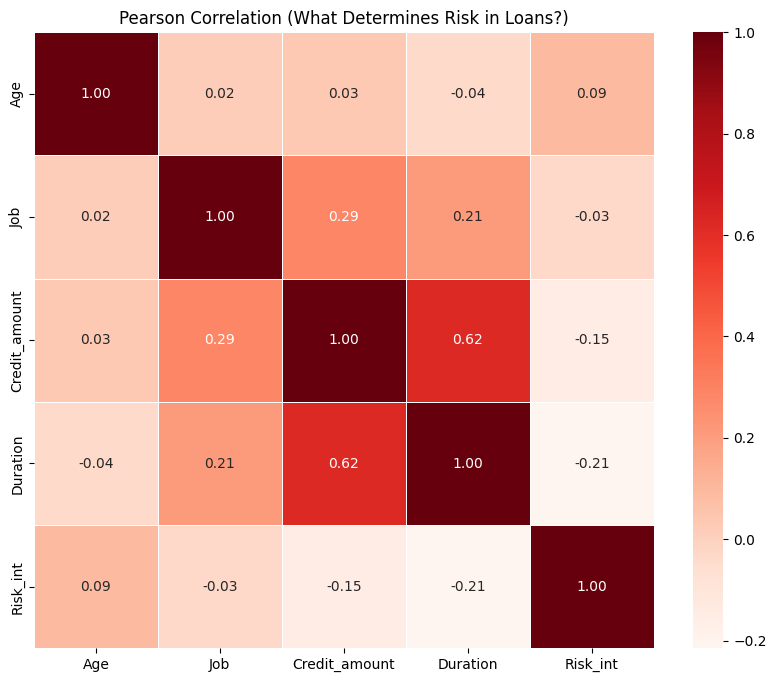

In [28]:
# @title
# Calculate the correlation matrix
corr = df.select_dtypes(include=np.number).corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='Reds', fmt='.2f', linewidths=0.5)
plt.title('Pearson Correlation (What Determines Risk in Loans?)')
plt.show()

Duration and Credit_amount are the most correlate with Risk (-0.21 and -0.15 respectively)
- The higher the credit amount borrowed, the most likely the loan will end up bad.
- The higher the duration of the loan, the most likely the loan will turn out to be bad

In [29]:
# @title

bad_credit_amount = df["Credit_amount"].loc[df['Risk'] == 'bad'].values.tolist()
good_credit_amount = df["Credit_amount"].loc[df['Risk'] == 'good'].values.tolist()
bad_duration = df['Duration'].loc[df['Risk'] == 'bad'].values.tolist()
good_duration = df['Duration'].loc[df['Risk'] == 'good'].values.tolist()


bad_loans = go.Scatter(
    x = bad_duration,
    y = bad_credit_amount,
    name = 'Bad Loans',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(152, 0, 0, .8)',
        line = dict(
            width = 2,
            color = 'rgb(0, 0, 0)'
        )
    )
)

good_loans = go.Scatter(
    x = good_duration,
    y = good_credit_amount,
    name = 'Good Loans',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'Blue',
        line = dict(
            width = 2,
        )
    )
)

data = [bad_loans, good_loans]

layout = dict(title = 'Correlation of Risk with <br> Credit Amount Borrowed',
              yaxis = dict(zeroline = False),
              xaxis = dict(zeroline = False)
             )

fig = dict(data=data, layout=layout)
iplot(fig, filename='styled-scatter')

In [30]:
# @title
radio_tv = np.sum(df['Credit_amount'].loc[df['Purpose'] == 'radio/TV'].values)
education = np.sum(df['Credit_amount'].loc[df['Purpose'] == 'education'].values)
furniture = np.sum(df['Credit_amount'].loc[df['Purpose'] == 'furniture/equipment'].values)
car = np.sum(df['Credit_amount'].loc[df['Purpose'] == 'car'].values)
business = np.sum(df['Credit_amount'].loc[df['Purpose'] == 'business'].values)
domestic_app = np.sum(df['Credit_amount'].loc[df['Purpose'] == 'domestic appliances'].values)
repairs = np.sum(df['Credit_amount'].loc[df['Purpose'] == 'repairs'].values)
vacation_others = np.sum(df['Credit_amount'].loc[df['Purpose'] == 'vacation/others'].values)

df_purposes = pd.DataFrame(data=[[radio_tv, education, furniture, car, business, domestic_app, repairs, vacation_others]],
                          columns=df["Purpose"].unique())

print(df_purposes)

data = [
    go.Scatterpolar(
        r = [radio_tv, education, furniture,car, business, domestic_app, repairs, vacation_others],
        theta = df['Purpose'].unique().tolist(),
        line = dict(
            color = "#ff7f50"
        ),
        mode = 'lines+markers',
        fill='toself',
        marker = dict(
            color = '#8090c7',
            symbol='square',
            size=6
        )
    )
]

layout = go.Layout(
    showlegend = False,
    title= "Credit Distribution by Purpose",
    paper_bgcolor = "rgb(255, 245, 250)"
)

fig = dict(data=data, layout=layout)
iplot(fig, filename = 'polar/basic')

   radio/TV  education  furniture/equipment      car  business  \
0    696543     169873               555125  1269881    403330   

   domestic appliances  repairs  vacation/others  
0                17976    60018            98512  


In [31]:
# @title
df['Purpose'].unique()

cross_purpose = pd.crosstab(df['Purpose'], df['Risk']).apply(lambda x: x/x.sum() * 100)
cross_purpose = cross_purpose.round(decimals=2)
cross_purpose.sort_values(by=['bad'])

Risk,bad,good
Purpose,,
domestic appliances,1.33,1.14
vacation/others,1.67,1.00
repairs,2.67,2.00
education,7.67,5.14
business,11.33,9.00
furniture/equipment,19.33,17.57
radio/TV,20.67,31.14
car,35.33,33.00


- Car Loans: This category has the highest credit amount, indicating that customers are borrowing more for purchasing cars compared to other purposes.
- Business and Furniture/Equipment Loans: These categories also have relatively high credit amounts, suggesting a significant demand for financing business ventures and household items.
- Education and Vacation/Others: These categories have moderate credit amounts, indicating a balanced but not excessive demand for educational and miscellaneous purposes.
- Radio/TV, Repairs, and Domestic Appliances: These categories have the lowest credit amounts, implying that customers borrow less for these specific purposes.

In [32]:
# @title
purposes = df['Purpose'].unique().tolist()
purposes = sorted(purposes)

good_purposes = cross_purpose["good"].values.tolist()
bad_purposes = cross_purpose["bad"].values.tolist()




good = go.Bar(
    x=purposes,
    y=good_purposes,
    name='Good Risk',
    text='%',
    marker=dict(
        color='rgb(123, 255, 255)',
        line=dict(
            color='rgb(0, 213, 213)',
            width=1.5
        )
    ),
)
bad = go.Bar(
    x=purposes,
    y=bad_purposes,
    name='Bad Risk',
    text = '%',
    marker=dict(
        color='rgb(255, 123, 123)',
        line=dict(
            color='rgb(213, 0, 0)',
            width=1.5
        )
    ),
)
data = [good, bad]
layout = go.Layout(
    title='Which Purpose Carried the Highest Risk?',
    xaxis=dict(
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Percentage(%)',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15,
    bargroupgap=0.1
)

fig = dict(data=data, layout=layout)
iplot(fig, filename='style-bar')

**Car Loans:**
Highest proportion of "Bad Risk" (~35%), indicating car loans carry the most significant risk of default among all categories.

**Furniture/Equipment and Radio/TV Loans:**
Both categories have high "Bad Risk" percentages, around 30%, suggesting these purposes are also associated with substantial credit risk.

**Business Loans:**
The "Bad Risk" is lower (~15%) but still notable, showing moderate risk levels compared to car and consumer goods loans.

**Domestic Appliances and Repairs:**
Both categories have minimal risk, with very low "Bad Risk" percentages, indicating that these loan purposes are the safest.

**Education and Vacation/Others:**
Moderate risk with "Bad Risk" percentages around 20-25%, suggesting balanced risk but still higher than repair and appliance loans.

In [33]:
# @title
cross_credit = df.groupby(['Risk', 'Purpose'], as_index=False).Credit_amount.sum()

good_amnt = cross_credit["Credit_amount"].loc[cross_credit["Risk"] == "good"].values.tolist()
bad_amnt = cross_credit["Credit_amount"].loc[cross_credit["Risk"] == "bad"].values.tolist()

good_risk = {"x": good_amnt,
          "y": purposes,
          "marker": {"color": "rgb(28, 98, 98)", "size": 12},
          "mode": "markers",
          "name": "Good Risk",
          "type": "scatter"
}

bad_risk = {"x": bad_amnt,
          "y": purposes,
          "marker": {"color": "Blue", "size": 12},
          "mode": "markers",
          "name": "Bad Risk",
          "type": "scatter",
}

data = [good_risk, bad_risk]
layout = {"title": "Credit Loan Applications by Purpose",
          "xaxis": {"title": "Credit Amount Borrowed", },
          "yaxis": {"title": ""},
         "width": 800,
         "height": 700}

fig = dict(data=data, layout=layout)
iplot(fig, filename='basic_dot-plot')

# **5. DATA PREPROCESSING**
- Importing ML librarys
- Setting X and y variables to the prediction
- Splitting Data



In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import train_test_split, KFold, cross_val_score # to split the data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

Looking for null values

In [37]:
# @title
org_df.isnull().sum().sort_values(ascending=False)

,0
Checking account,394
Saving accounts,183
Age,0
Sex,0
Job,0
Housing,0
Credit amount,0
Duration,0
Purpose,0
Risk,0


In [38]:
# @title
org_df.drop(['Checking account', 'Saving accounts'], axis=1, inplace=True)

Drop 'Checking_account' and 'Saving_Accounts' features

In [40]:

def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [41]:
# @title
org_df = org_df.apply(lambda x: object_to_int(x))
org_df.head()

,Age,Sex,Job,Housing,Credit amount,Duration,Purpose,Risk
0,67,1,2,1,1169,6,5,1
1,22,0,2,1,5951,48,5,0
2,49,1,1,1,2096,12,3,1
3,45,1,2,0,7882,42,4,1
4,53,1,2,0,4870,24,1,0


Convert to int to prepare the data to future ML model

In [57]:
X = org_df.drop(columns = ['Risk'])
y = org_df['Risk'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=1000)
clf = DecisionTreeClassifier(random_state=1000, max_depth = 5)
model = clf.fit(X_train, y_train)

Split data to test and train (20 - 80)

# **6. MACHINE LEARNING**

LR: 0.951063 (0.036722)
LDA: 0.941738 (0.032797)
KNN: 0.818562 (0.033626)
CART: 0.728985 (0.059717)
NB: 0.900795 (0.037608)
RF: 0.878688 (0.045324)
SVM: 0.998246 (0.005263)
XGB: 0.817748 (0.050203)


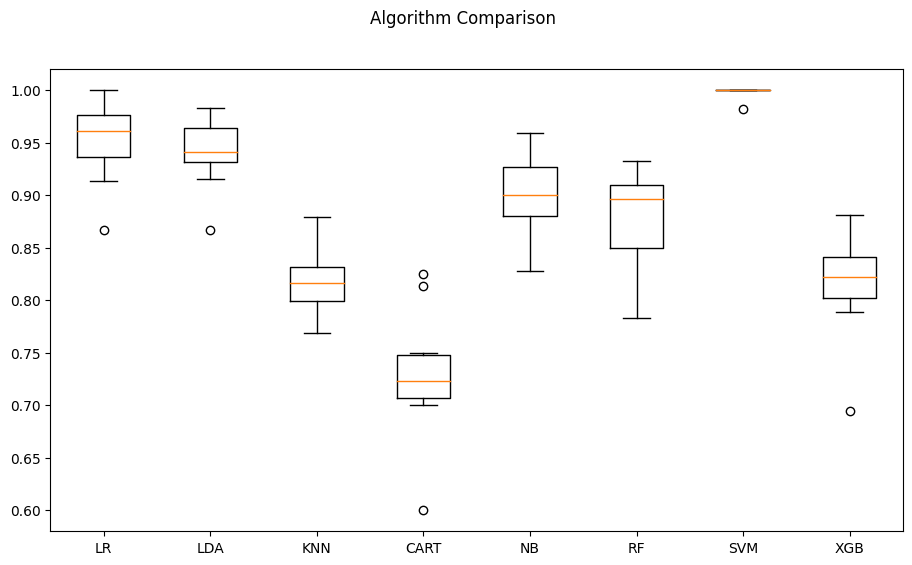

In [58]:
# @title
# to feed the random state
seed = 7

# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('XGB', XGBClassifier()))

# evaluate each model in turn
results = []
names = []
scoring = 'recall'

for name, model in models:
        kfold = KFold(n_splits=10, random_state=seed, shuffle=True) # Added shuffle=True to fix the error
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

# boxplot algorithm comparison
fig = plt.figure(figsize=(11,6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Almost all models shows a high value to recall.

We can observe that our best results was with SVM, LR and LDA.

**6.1 USING DECISION TREE**

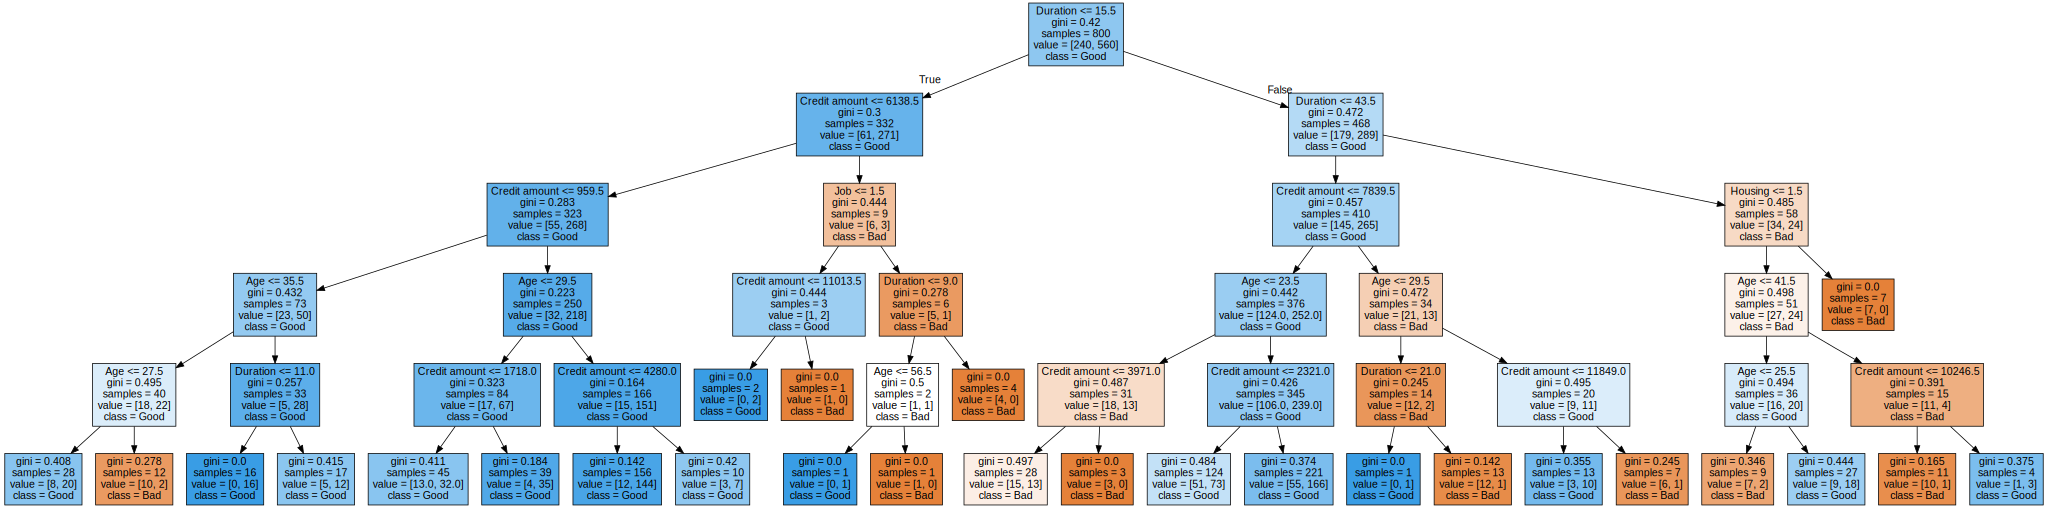

In [59]:
# @title
import graphviz
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=X.columns,
                                class_names=['Bad', "Good"],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph

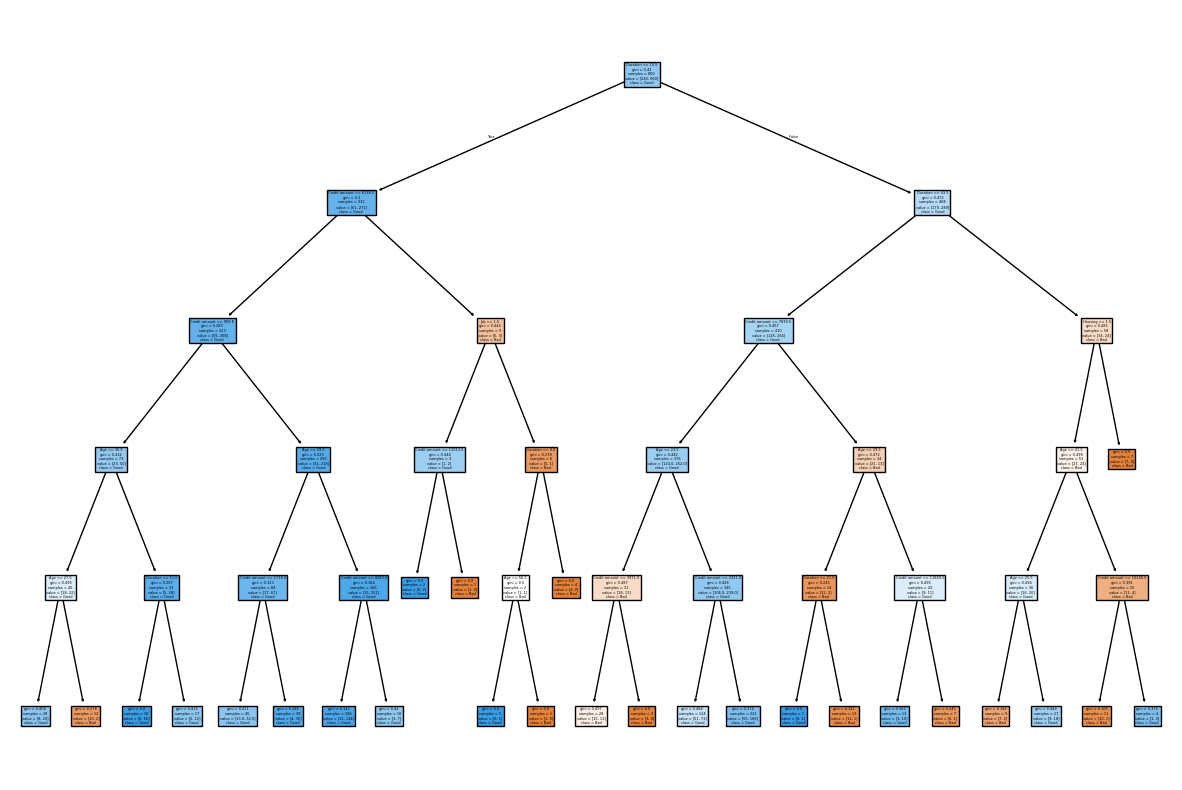

In [60]:
# @title
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(clf,
                   feature_names=X.columns,
                   class_names=['Bad', "Good"],
                   filled=True)

**Credit Amount:**
- Low Credit Amount (≤ 6138.5): Predominantly "Good" risk. Lower amounts are easier to repay.
- High Credit Amount (> 8225): Strongly linked to "Bad" risk. Higher financial burden increases default likelihood.

**Loan Duration:**
- Short Duration (≤ 15.5): Generally "Good" risk, as shorter terms are less financially taxing.
- Long Duration (> 43.5): Associated with "Bad" risk, indicating a higher chance of repayment issues.

**Age:**
- Younger Borrowers (≤ 29.5): More likely to be classified as "Good" risk, possibly due to lower credit amounts or stable income.
- Older Borrowers (> 56.5): Often linked to "Bad" risk, especially when combined with large loans or longer durations.

**Housing Type:**
- Low Housing Index (≤ 1.5): More likely to be "Bad" risk, indicating less financial stability.
- Higher Housing Index: Linked to "Good" risk, suggesting better financial conditions and stability.

**Key Points:**

- Shorter Duration + Lower Amounts = Good Risk
- High Credit Amounts = Bad Risk
- Young borrowers and customers who have high housing index are lessly to be bad risk.

In [64]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation on the decision tree model
cv_scores = cross_val_score(clf, X, y, cv=5)  # Using 5-fold cross-validation

# Display cross-validation scores
print(f"Cross-Validation Scores for each fold: {cv_scores}")

# Calculate and display the average cross-validation score
average_score = np.mean(cv_scores)
std_dev = np.std(cv_scores)
print(f"Average Cross-Validation Score: {average_score:.2f}")
print(f"Standard Deviation of Cross-Validation Scores: {std_dev:.2f}")


Cross-Validation Scores for each fold: [0.705 0.705 0.685 0.725 0.715]
Average Cross-Validation Score: 0.71
Standard Deviation of Cross-Validation Scores: 0.01


**Cross-Validation Evaluation:**

Scores range from 0.685 to 0.725, indicating stable performance across different data splits with minimal variation.

**Average Score (0.71):**

The average score of 71% suggests that the model performs reasonably well but still has room for improvement.

**Standard Deviation (0.01):**

A low standard deviation shows high consistency, meaning the model's performance is reliable across different folds.

**Overall Assessment:**

The model is stable and performs consistently but could benefit from further optimization, such as feature selection, parameter tuning, or testing alternative models.